# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
# Import numpy for numerical operations and array handling
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for enhanced statistical data visualization
import seaborn as sns

In [ ]:
# Specify the correct encoding when reading the CSV file
df = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')

In [ ]:
# Preview the first few rows of the dataset
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
# Display summary information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
# Display the unique values in the 'flight_day' column (e.g., 'Mon', 'Tue', etc.)
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
# Create a mapping from weekday abbreviations to numerical values (Mon = 1, ..., Sun = 7)
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

# Apply the mapping to convert the 'flight_day' column to numeric values
df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
# Confirm the transformation by checking the unique values again
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

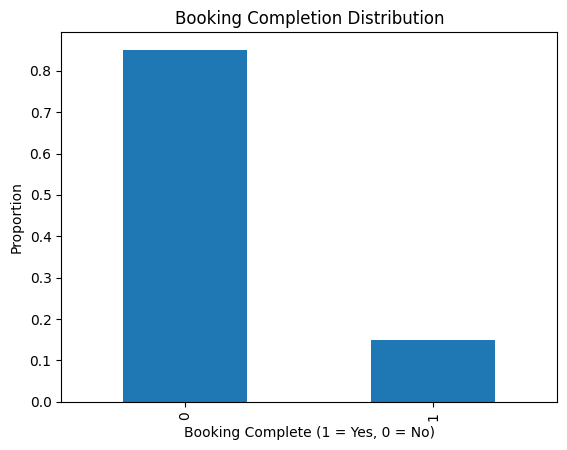

In [ ]:
# Plot the distribution of the target variable 'booking_complete'
df['booking_complete'].value_counts(normalize=True).plot(kind='bar')

# Add title and axis labels to the plot
plt.title('Booking Completion Distribution')
plt.xlabel('Booking Complete (1 = Yes, 0 = No)')
plt.ylabel('Proportion')

# Display the plot
plt.show()

In [ ]:
# One-hot encode categorical columns
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Import SMOTE for handling class imbalance by generating synthetic samples
from imblearn.over_sampling import SMOTE

# Import train_test_split for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

# Define features (X) by dropping the target column 'booking_complete'
X = df.drop('booking_complete', axis=1)

# Define the target variable (y)
y = df['booking_complete']

# Convert categorical variables in X into dummy/indicator variables
# drop_first=True avoids multicollinearity by removing one level from each categorical variable
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

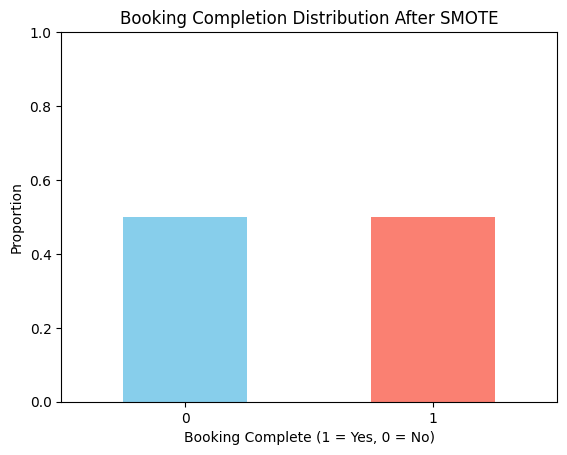

In [ ]:
# Plot the resampled class distribution
y_resampled.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Booking Completion Distribution After SMOTE')
plt.xlabel('Booking Complete (1 = Yes, 0 = No)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict & evaluate
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7990  454]
 [1016 7549]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8444
           1       0.94      0.88      0.91      8565

    accuracy                           0.91     17009
   macro avg       0.92      0.91      0.91     17009
weighted avg       0.92      0.91      0.91     17009



In [ ]:
# Cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.7180393485447663


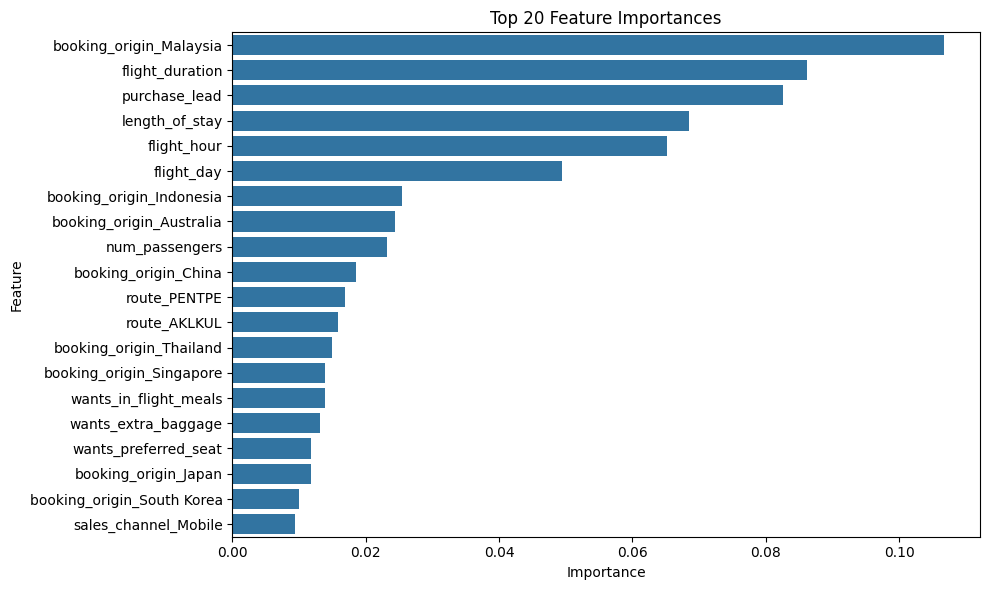

In [ ]:
# Get feature importances from a trained model (e.g., RandomForest, GradientBoosting, etc.)
importances = model.feature_importances_

# Get the feature names from the input data
features = X.columns

# Sort the indices of features by their importance in descending order
indices = np.argsort(importances)[::-1]

# Limit to the top 20 most important features
top_n = 20
top_features = features[indices][:top_n]
top_importances = importances[indices][:top_n]

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot of the top 20 features by importance
sns.barplot(x=top_importances, y=top_features)

# Add plot title and axis labels
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
